In [19]:
import pandas as pd
import numpy as np
import sys
import pickle
import glob
import os
import matplotlib.pyplot as plt
import sqlite3

In [20]:
EXPERIMENT_DIR = '/data2/experiments/P3856'
# EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/dwm-test'
MINIMUM_NUMBER_OF_RUNS = 5

In [21]:
EXTRACTED_FEATURES_DIR = "{}/extracted-features".format(EXPERIMENT_DIR)
EXTRACTED_FEATURES_DB_NAME = "{}/extracted-features.sqlite".format(EXTRACTED_FEATURES_DIR)

#### look at sequences that appear in more half the runs in the experiment

In [22]:
subset_group = 'YHE114'

In [23]:
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
sequences_df = pd.read_sql_query('select sequence,charge,file_idx,peak_idx,human,run_name,intensity,isotope_idx_not_in_saturation,inferred,run_group,short_run_name,monoisotopic_mz_centroid,rt_apex,scan_apex from features where run_group==\'{}\' and classed_as==\'target\' order by intensity desc'.format(subset_group), db_conn)
sequences_df.human = sequences_df.human.astype(bool)
sequences_df.inferred = sequences_df.inferred.astype(bool)
db_conn.close()


In [24]:
sequences_df['log_intensity'] = np.log2(sequences_df.intensity)

In [25]:
sequences_df.sample(10).sort_values(by=['intensity','sequence','charge'], ascending=False, inplace=False)


,sequence,charge,file_idx,peak_idx,human,run_name,intensity,isotope_idx_not_in_saturation,inferred,run_group,short_run_name,monoisotopic_mz_centroid,rt_apex,scan_apex,log_intensity
5098,AALDCSTSHLDEFYSDPHAVAGALK,3,3,0,True,P3856_YHE114_9_Slot1-1_1_5123,7024,0,False,YHE114,YHE114_9,892.418065,1883.546975,425,12.778077
20026,QELEEICHDLEAR,2,6,0,True,P3856_YHE114_5_Slot1-1_1_5119,2959,0,False,YHE114,YHE114_5,821.379613,1793.511487,386,11.530894
44068,DLAILQCHGELDPMVPVR,2,16,0,True,P3856_YHE114_6_Slot1-1_1_5120,1633,0,False,YHE114,YHE114_6,1032.025575,2030.178931,161,10.673309
75028,ETLESALIALDSEKPK,2,20,0,True,P3856_YHE114_4_Slot1-1_1_5118,1045,0,False,YHE114,YHE114_4,872.472348,1976.291759,173,10.029287
78373,SEIVPLFTSLASDEQDSVR,2,6,0,True,P3856_YHE114_5_Slot1-1_1_5119,1006,0,False,YHE114,YHE114_5,1047.023596,2134.337622,176,9.974415
96497,CEAFGWHAIIVDGHSVEELCK,3,4,0,True,P3856_YHE114_2_Slot1-1_1_5116,830,0,False,YHE114,YHE114_2,819.715777,1927.501972,578,9.696968
104750,YSGSYNDYLR,2,4,0,True,P3856_YHE114_2_Slot1-1_1_5116,767,0,False,YHE114,YHE114_2,619.276766,1702.037187,801,9.583083
128357,VAMFLTDSNNIK,2,4,0,True,P3856_YHE114_2_Slot1-1_1_5116,618,0,False,YHE114,YHE114_2,676.846858,1865.040258,696,9.271463
153971,IEVVNFLVPNAVYDIVK,2,15,0,True,P3856_YHE114_3_Slot1-1_1_5117,487,0,False,YHE114,YHE114_3,966.545140,2308.473487,232,8.927778
162454,AIQTLGYFPVGDGDFPHQK,2,16,0,True,P3856_YHE114_6_Slot1-1_1_5120,447,0,False,YHE114,YHE114_6,1045.521538,1948.678254,117,8.804131


#### analyse a selected sequence across the experiment for runs in which it was classified as a target

In [26]:
selected_sequence = 'SFSSTLLSIFQSSPER'
selected_sequence_charge = 2

In [27]:
selected_sequence_df = sequences_df[(sequences_df.sequence == selected_sequence) & (sequences_df.charge == selected_sequence_charge)].copy()
selected_sequence_df.sort_values(by=['short_run_name'], inplace=True)

In [28]:
np.std(selected_sequence_df.intensity) / np.mean(selected_sequence_df.intensity)

0.5708579366882304

In [29]:
selected_sequence_df

,sequence,charge,file_idx,peak_idx,human,run_name,intensity,isotope_idx_not_in_saturation,inferred,run_group,short_run_name,monoisotopic_mz_centroid,rt_apex,scan_apex,log_intensity
190662,SFSSTLLSIFQSSPER,2,14,0,True,P3856_YHE114_1_Slot1-1_1_5115,307,0,False,YHE114,YHE114_1,893.454747,2222.798365,375,8.262095
51629,SFSSTLLSIFQSSPER,2,27,1,True,P3856_YHE114_10_Slot1-1_1_5124,1434,0,False,YHE114,YHE114_10,893.454743,2235.471684,389,10.485829
30973,SFSSTLLSIFQSSPER,2,4,0,True,P3856_YHE114_2_Slot1-1_1_5116,2157,0,False,YHE114,YHE114_2,893.456098,2222.835074,395,11.074810
17563,SFSSTLLSIFQSSPER,2,15,0,True,P3856_YHE114_3_Slot1-1_1_5117,3251,0,False,YHE114,YHE114_3,893.456911,2225.383297,391,11.666668
15318,SFSSTLLSIFQSSPER,2,20,1,True,P3856_YHE114_4_Slot1-1_1_5118,3573,0,False,YHE114,YHE114_4,893.456151,2234.542680,389,11.802920
31298,SFSSTLLSIFQSSPER,2,6,1,True,P3856_YHE114_5_Slot1-1_1_5119,2141,0,False,YHE114,YHE114_5,893.457186,2225.359620,380,11.064069
56523,SFSSTLLSIFQSSPER,2,16,2,True,P3856_YHE114_6_Slot1-1_1_5120,1328,0,False,YHE114,YHE114_6,893.452622,2234.454149,388,10.375039
18152,SFSSTLLSIFQSSPER,2,12,1,True,P3856_YHE114_7_Slot1-1_1_5121,3174,0,False,YHE114,YHE114_7,893.454770,2235.460817,384,11.632086
73842,SFSSTLLSIFQSSPER,2,11,1,True,P3856_YHE114_8_Slot1-1_1_5122,1060,0,False,YHE114,YHE114_8,893.454751,2234.680135,386,10.049849
129185,SFSSTLLSIFQSSPER,2,3,0,True,P3856_YHE114_9_Slot1-1_1_5123,614,0,False,YHE114,YHE114_9,893.456164,2237.059182,229,9.262095


#### compare the intensities across the experiment for the selected sequence

In [30]:
MAX_SUMMED_APEX_POINTS = 3 * 3000

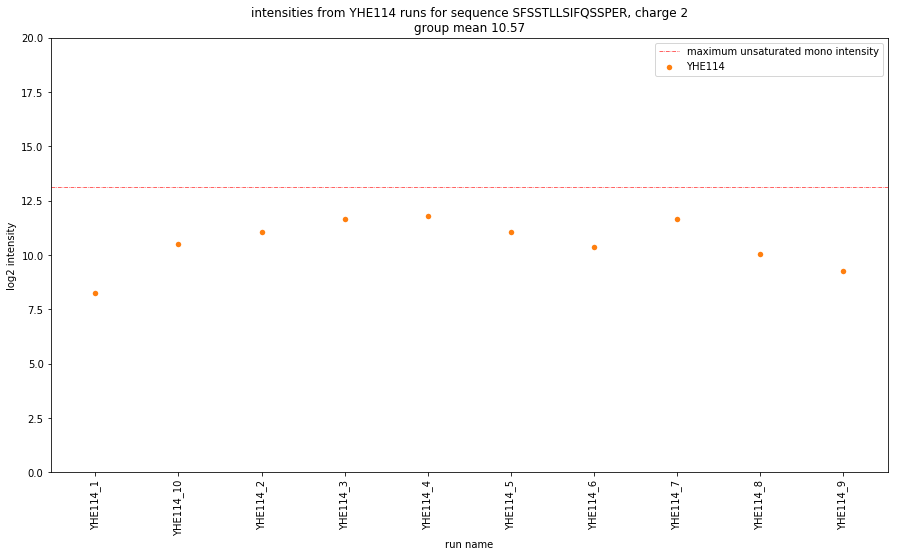

In [31]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)

mean_group = round(np.mean(np.log2(selected_sequence_df.intensity)), 2)

plt.title('intensities from {} runs for sequence {}, charge {}\ngroup mean {}'.format(subset_group, selected_sequence, selected_sequence_charge, mean_group))

ax1.scatter(selected_sequence_df.short_run_name, selected_sequence_df.log_intensity, marker='o', color='tab:orange', lw=0, s=30, alpha=1.0, label=subset_group)

# highlight whether a point was adjusted for saturation
adj_sat = selected_sequence_df[(selected_sequence_df.isotope_idx_not_in_saturation > 0)]
if len(adj_sat) > 0:
    ax1.plot(adj_sat.short_run_name, adj_sat.log_intensity, marker='o', markerfacecolor='none', markeredgecolor='springgreen', linestyle='', markeredgewidth=2, ms=15, label='inferred intensity')

# show which isotope was used as a reference
text_style = dict(size=10, color='blue')
for idx,row in adj_sat.iterrows():
    ax1.text(row.short_run_name, row.log_intensity+2.1, "ref iso {}".format(int(row.isotope_idx_not_in_saturation)), **text_style, rotation=90)

plt.axhline(y=np.log2(MAX_SUMMED_APEX_POINTS), color='red', linestyle='-.', linewidth=0.6, label='maximum unsaturated mono intensity')

plt.xlabel('run name')
plt.ylabel('log2 intensity')
plt.legend(loc='best')

# plt.xlim((0,50))
plt.ylim((0,20))
plt.xticks(rotation=90)

plt.show()

#### look at the distribution of intensity CV across the group runs

In [32]:
sequences_df.columns

Index(['sequence', 'charge', 'file_idx', 'peak_idx', 'human', 'run_name',
       'intensity', 'isotope_idx_not_in_saturation', 'inferred', 'run_group',
       'short_run_name', 'monoisotopic_mz_centroid', 'rt_apex', 'scan_apex',
       'log_intensity'],
      dtype='object')

In [35]:
# find the intensity, RT, CCS, m/z CV of each sequence in the runs
sequence_cv_l = []
for group_name,group_df in sequences_df.groupby(['sequence','charge'], as_index=False):
    if len(group_df) >= 2:
        sequence = group_name[0]
        charge = group_name[1]
        intensity_cv = np.std(group_df.intensity) / np.mean(group_df.intensity)
        mz_cv = np.std(group_df.monoisotopic_mz_centroid) / np.mean(group_df.monoisotopic_mz_centroid)
        rt_cv = np.std(group_df.rt_apex) / np.mean(group_df.rt_apex)
        scan_cv = np.std(group_df.scan_apex) / np.mean(group_df.scan_apex)
        sequence_cv_l.append((sequence,charge,intensity_cv,mz_cv,rt_cv,scan_cv))
sequence_cv_df = pd.DataFrame(sequence_cv_l, columns=['sequence','charge','intensity_cv','mz_cv','rt_cv','scan_cv'])


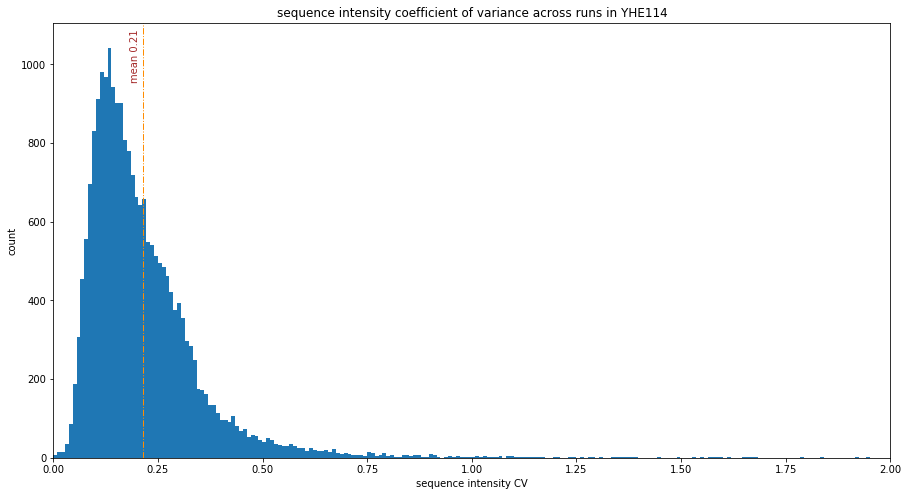

In [36]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = sequence_cv_df.intensity_cv
y, x, _ = ax1.hist(values, bins=bins)
mean = np.mean(values)
ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')
text_style = dict(size=10, color='brown', verticalalignment='center', horizontalalignment='left')
ax1.text(mean*0.85, y.max()*0.98, "mean {}".format(round(mean,2)), **text_style, rotation='vertical')

plt.xlabel('sequence intensity CV')
plt.ylabel('count')
plt.title('sequence intensity coefficient of variance across runs in {}'.format(subset_group))
plt.xlim((0,2))
# plt.ylim((0,1000))

plt.show()

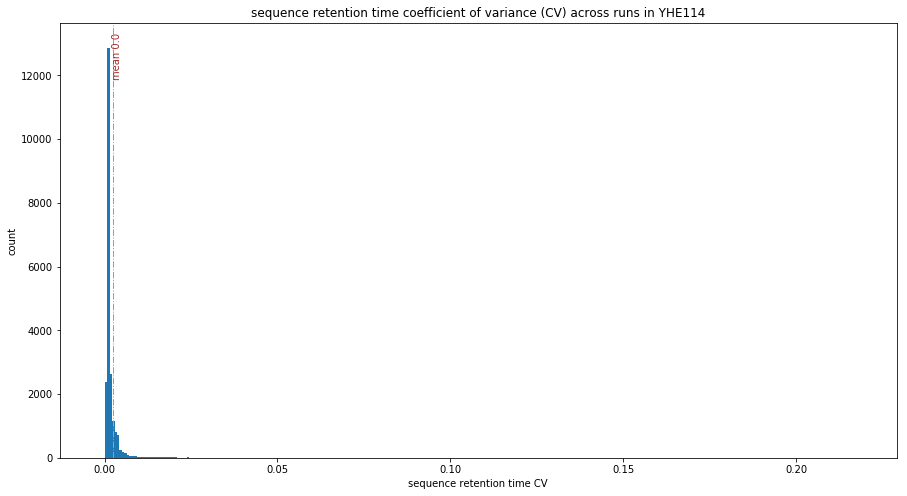

In [41]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = sequence_cv_df.rt_cv
y, x, _ = ax1.hist(values, bins=bins)
mean = np.mean(values)
ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')
text_style = dict(size=10, color='brown', verticalalignment='center', horizontalalignment='left')
ax1.text(mean*0.85, y.max()*0.98, "mean {}".format(round(mean,2)), **text_style, rotation='vertical')

plt.xlabel('sequence retention time CV')
plt.ylabel('count')
plt.title('sequence retention time coefficient of variance (CV) across runs in {}'.format(subset_group))
# plt.xlim((0,0.05))
# plt.ylim((0,1000))

plt.show()

In [43]:
sequence_cv_df[sequence_cv_df.rt_cv > 0.1].sample(n=4)

,sequence,charge,intensity_cv,mz_cv,rt_cv,scan_cv
612,AHATTSNTVSK,2,0.188216,6.664590e-07,0.146963,0.012055
14184,NSSNKPAVTTK,2,0.265090,6.506067e-08,0.110634,0.012683
18267,THGAPTDEVR,2,0.305108,3.248230e-07,0.116062,0.003559
14011,NPQQQESLK,2,0.374722,1.221310e-06,0.128284,0.007100


In [48]:
sequences_df[sequences_df.sequence == 'NPQQQESLK'].rt_apex

58082     1626.374843
68579     1622.598945
77058     1060.981966
82207     1628.180443
104608    1610.520576
135406    1615.210650
196111    1458.309278
Name: rt_apex, dtype: float64

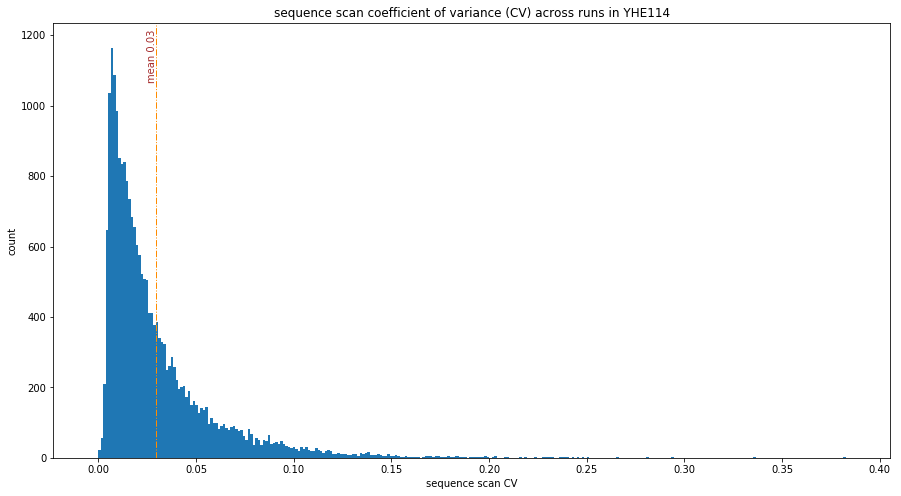

In [40]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = sequence_cv_df.scan_cv
y, x, _ = ax1.hist(values, bins=bins)
mean = np.mean(values)
ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')
text_style = dict(size=10, color='brown', verticalalignment='center', horizontalalignment='left')
ax1.text(mean*0.85, y.max()*0.98, "mean {}".format(round(mean,2)), **text_style, rotation='vertical')

plt.xlabel('sequence scan CV')
plt.ylabel('count')
plt.title('sequence scan coefficient of variance (CV) across runs in {}'.format(subset_group))
# plt.xlim((0,0.05))
# plt.ylim((0,1000))

plt.show()

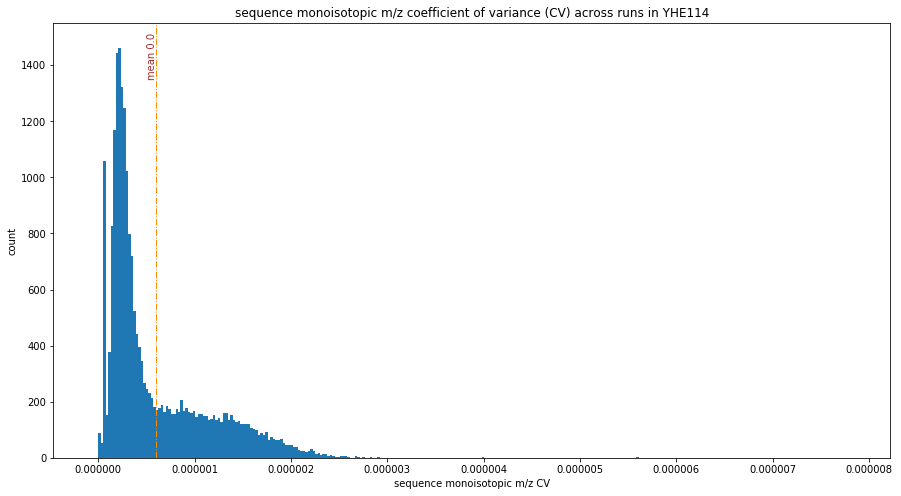

In [49]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = sequence_cv_df.mz_cv
y, x, _ = ax1.hist(values, bins=bins)
mean = np.mean(values)
ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')
text_style = dict(size=10, color='brown', verticalalignment='center', horizontalalignment='left')
ax1.text(mean*0.85, y.max()*0.98, "mean {}".format(round(mean,2)), **text_style, rotation='vertical')

plt.xlabel('sequence monoisotopic m/z CV')
plt.ylabel('count')
plt.title('sequence monoisotopic m/z coefficient of variance (CV) across runs in {}'.format(subset_group))
# plt.xlim((0,0.05))
# plt.ylim((0,1000))

plt.show()